## import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## read the data

In [3]:
churn_data=pd.read_csv(r'C:\Users\raima\Downloads\DataFiles\telecom_churn_data.csv')
churn_data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


## create categorical and numerical columns

In [5]:
cat=churn_data.select_dtypes(include='object').columns
num=churn_data.select_dtypes(exclude='object').columns
cat,num

(Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object'),
 Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
        'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
        'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
        'customer_support_calls', 'churn'],
       dtype='object'))

## find length

In [7]:
len(cat),len(num)

(4, 12)

## find shape

In [9]:
churn_data.shape

(2000, 16)

## find size

In [11]:
churn_data.size

32000

## find info

In [13]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

## head

In [15]:
churn_data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


## missing or null values

In [17]:
churn_data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

## checking data quality or data cleaning

In [19]:
churn_data['churn'].unique()

array([ 0.,  1., nan])

In [25]:
churn_data['churn'].value_counts()

churn
0.0    1703
1.0     262
Name: count, dtype: int64

- first everyone understand your data
- understand about column meaning
- basic behavior : num of days will be numerical only
- original integer then fill int
- churn 1 or 0 means yes or no
- recognize and remove or drop unuseful columns 

In [27]:
Mode=churn_data['churn'].mode()
Mode

0    0.0
Name: churn, dtype: float64

In [29]:
import warnings
warnings.filterwarnings('ignore')
churn_data['churn'].fillna(Mode[0],inplace=True)

In [31]:
churn_data['churn'].isnull().sum()

0

In [33]:
churn=churn_data['churn']
churn

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: float64

In [35]:
churn.value_counts()

churn
0.0    1738
1.0     262
Name: count, dtype: int64

In [37]:
label=churn.value_counts().keys()
value=churn.value_counts().values
label,value

(Index([0.0, 1.0], dtype='float64', name='churn'),
 array([1738,  262], dtype=int64))

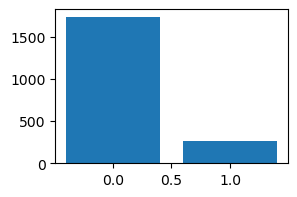

In [41]:
plt.figure(figsize=(3,2))
plt.bar(label,value)
plt.show()

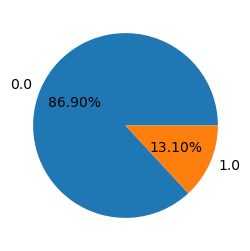

In [51]:
plt.figure(figsize=(3,3))
plt.pie(value,
       labels=label,
       autopct='%0.2f%%')
plt.show()

## deleting the useless columns

In [55]:
churn_data.drop(['phone_no','year','customer_id'],axis=1,inplace=True)

In [57]:
churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


## categorical column analysis

In [59]:
cat=churn_data.select_dtypes(include='object').columns
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

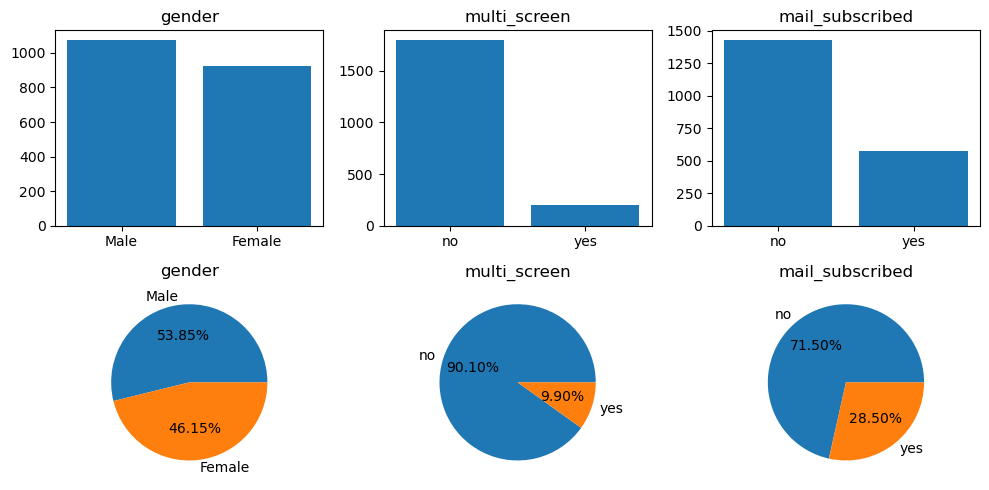

In [231]:
x,y=1,4
plt.figure(figsize=(10,5))
for i in cat:
    Mode=churn_data[i].mode()
    warnings.filterwarnings('ignore')
    churn_data[i].fillna(Mode[0],inplace=True)
    col=churn_data[i]
    label=col.value_counts().keys()
    value=col.value_counts().values
    
    plt.subplot(2,3,x)
    x+=1
    plt.title(f'{i}')
    plt.bar(label,value)
    
    plt.subplot(2,3,y)
    y+=1
    plt.title(f'{i}')
    plt.pie(value,
           labels=label,
           autopct='%0.2f%%')
plt.tight_layout()
plt.show()


## numerical column analysis

In [85]:
num=churn_data.select_dtypes(exclude='object').columns
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [93]:
for i in num:
    print(i,len(churn_data[i].value_counts()))

age 63
no_of_days_subscribed 204
weekly_mins_watched 1260
minimum_daily_mins 149
maximum_daily_mins 1260
weekly_max_night_mins 111
videos_watched 19
maximum_days_inactive 7
customer_support_calls 10
churn 2


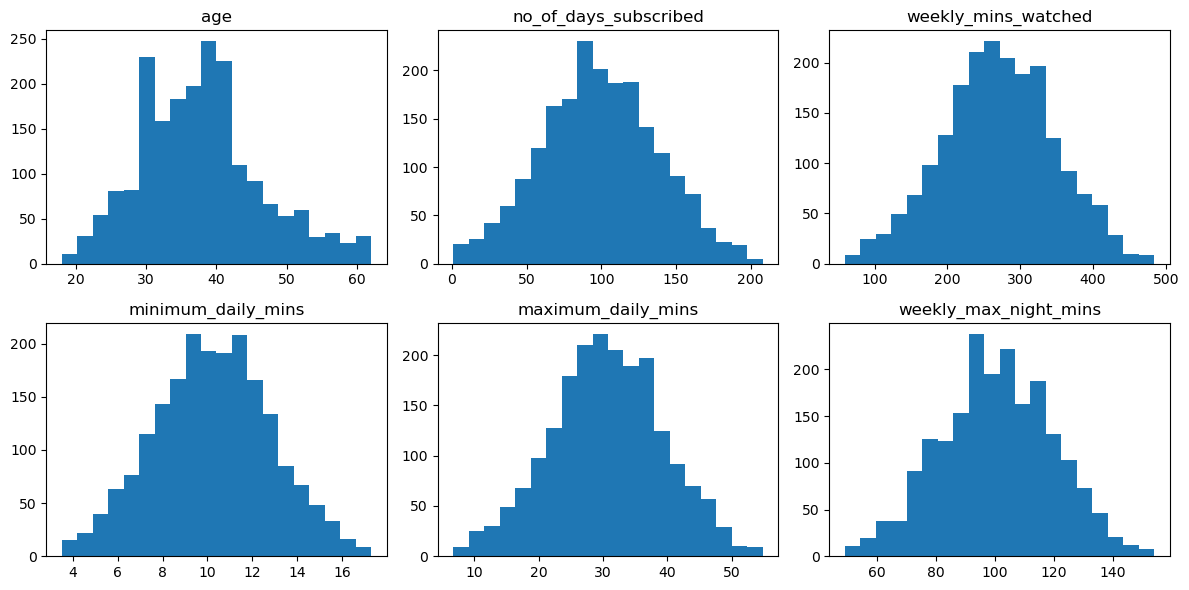

In [247]:
a=1
plt.figure(figsize=(12,6))
for i in num[:-4]:
    q1=np.percentile(churn_data[i],25)
    q3=np.percentile(churn_data[i],75)
    iqr=q3-q1
    con=(churn_data[i]<(q1-1.5*iqr))|(churn_data[i]>(q3+1.5*iqr))    
    m=np.mean(churn_data[i])
    new_churn_data=churn_data.copy()
    new_churn_data.loc[con,i]=m    
    if new_churn_data[i].dtypes=='int64':
        Mean=round(new_churn_data[i].mean())
    else:
        Mean=new_churn_data[i].mean()
    warnings.filterwarnings('ignore')
    new_churn_data[i].fillna(Mean,inplace=True)
    col=new_churn_data[i]    
    plt.subplot(2,3,a)
    plt.title(f'{i}')
    plt.hist(col,bins=20)
    a+=1
plt.tight_layout()
plt.show()

## pre encoded categorical column analysis

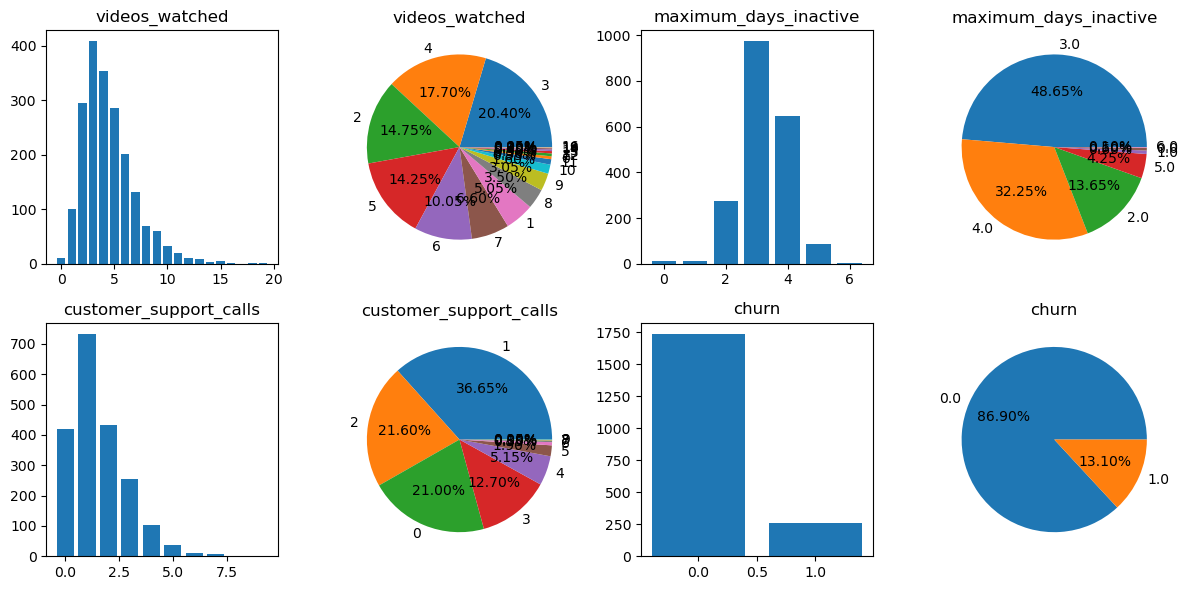

In [267]:
x,y=1,2
plt.figure(figsize=(12,6))
for i in num[-4:]:
    Mode=churn_data[i].mode()
    warnings.filterwarnings('ignore')
    churn_data[i].fillna(Mode[0],inplace=True)
    col=churn_data[i]
    label=col.value_counts().keys()
    value=col.value_counts().values
    
    plt.subplot(2,4,x)
    x+=2
    plt.title(f'{i}')
    plt.bar(label,value)
    
    plt.subplot(2,4,y)
    y+=2
    plt.title(f'{i}')
    plt.pie(value,
           labels=label,
           autopct='%0.2f%%')
plt.tight_layout()
plt.show()

## finding correlation

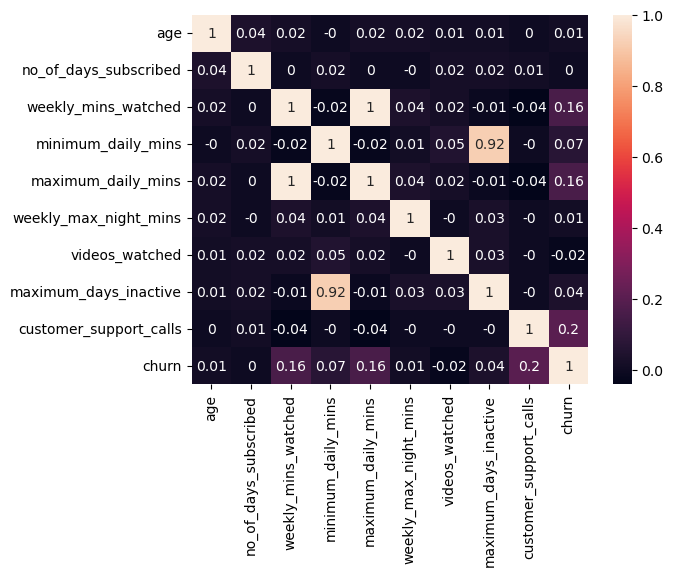

In [277]:
cor=churn_data.corr(numeric_only=True)
sns.heatmap(round(cor,2),annot=True)
plt.show()

## encoding categorical data

In [287]:
encoded_data=pd.get_dummies(churn_data,
               columns=cat,
               dtype='int')

In [289]:
encoded_data

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Female,gender_Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,1,0,1,0,1,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,1,0,1,0,1,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,1,0,1,0,1,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,1,0,1,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,75,182.25,11.3,20.66,97,5,4.0,2,0.0,1,0,1,0,0,1
1996,45,127,273.45,9.3,30.99,116,3,3.0,1,0.0,0,1,1,0,1,0
1997,53,94,128.85,15.6,14.60,110,16,5.0,0,0.0,0,1,1,0,1,0
1998,40,94,178.05,10.4,20.18,100,6,3.0,3,0.0,0,1,1,0,1,0


In [293]:
columns=encoded_data.columns

In [301]:
encoded_data

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Female,gender_Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,1,0,1,0,1,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,1,0,1,0,1,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,1,0,1,0,1,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,1,0,1,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,75,182.25,11.3,20.66,97,5,4.0,2,0.0,1,0,1,0,0,1
1996,45,127,273.45,9.3,30.99,116,3,3.0,1,0.0,0,1,1,0,1,0
1997,53,94,128.85,15.6,14.60,110,16,5.0,0,0.0,0,1,1,0,1,0
1998,40,94,178.05,10.4,20.18,100,6,3.0,3,0.0,0,1,1,0,1,0


## scaling data through MinMaxScaler

In [315]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for i in columns:
    encoded_data[i]=mms.fit_transform(encoded_data[[i]])
    

In [317]:
encoded_data

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Female,gender_Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,0.281250,0.252066,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.328125,0.611570,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.734375,0.516529,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.093750,0.537190,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.343750,0.785124,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.562500,0.305785,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1996,0.421875,0.520661,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1997,0.546875,0.384298,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1998,0.343750,0.384298,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,0.0
